# NewsMood Trends:

- From the dataframe we can see that the news networks tend to stay completely neutral in their sentiment, with a fairly common thread of 0's for Positive / Negative and 1's for Neutral. This is backed up by the solid line across the 0 mark for the composite score scatterplot 

- While it's difficult to detect many patterns between the networks on the scatterplot, the differences are much more pronounced in the aggregate bar chart. The BBC and CBS both have significantly positive aggregates, while CNN, Fox, and NYT all hover between -0.05 to +0.05. As the BBC and CBS are general broadcast networks while the others are more specialized in current affairs, it makes sense that their twitter accounts would register as more "positive", as they likely are tweeting about popular entertainment more often than the others.

- I found it interesting that CNN was more negative than Fox News, which has cultivated a reputation for being quite antagonistic. This might be attributed to the shift in political power from the 2016 election, but I would want to see an aggregate Vader analysis of each account's tweets from this point in Obama's first term in order to really gauge that.

# Dependencies / Keys

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
import numpy as np
import tweepy
from pandas.io.json import json_normalize as jnorm

In [6]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Twitter API Keys
consumer_key = "xxx"
consumer_secret = "xxx"
access_token = "xxx"
access_token_secret = "xxx"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Pull Tweets with Tweepy

In [79]:
# Set list of usernames to get tweets for
users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Create empty data list to add a dictionary of info per tweet
data = []
# Create empty data list to add a dictionary of composites per username
cmp_data = []

for user in users:
    # Get 100 tweets from their timeline
    tweets = api.user_timeline(user,count=100)
    
    # Create empty lists for composite score scatterplot
    cmp_scores = []
    
    for tweet in tweets:
        # Pull tweet's text and date
        text = tweet["text"]
        date = tweet["created_at"]
        
        # Run Vader analysis
        cmp = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        
        # Create dictionary listing for tweet
        user_data = {"Handle":user,
                     "Date":date,
                     "Text":text,
                     "Compound":cmp,
                     "Positive":pos,
                     "Neutral":neu,
                     "Negative":neg}
        # Add dictionary to data list
        data.append(user_data)
    
        # Create list of composite scores
        cmp_scores.append(cmp)
    
    # Create dictionary with list of composite scores
    cmp_data.append({"User":user,"Compound":cmp_scores})

# Create DataFrame

In [72]:
# Create a dataframe from the collected data
data_df = pd.DataFrame(data)

# Reorganize columns
data_df = data_df[["Handle","Date","Text","Compound","Positive","Neutral","Negative"]]

# Save to CSV
data_df.to_csv("news_mood.csv")

# Show head to confirm formatting
data_df.head()

,Handle,Date,Text,Compound,Positive,Neutral,Negative
0,@BBC,Thu Mar 08 20:33:04 +0000 2018,Jack Jarvis and Victor McDade are back for ano...,0.4019,0.144,0.856,0.000
1,@BBC,Thu Mar 08 20:03:04 +0000 2018,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,0.0000,0.000,1.000,0.000
2,@BBC,Thu Mar 08 18:00:06 +0000 2018,What advice would YOU give your younger self? ...,0.0000,0.000,1.000,0.000
3,@BBC,Thu Mar 08 17:30:11 +0000 2018,"In recognition of International Women’s Day, a...",-0.1027,0.159,0.664,0.177
4,@BBC,Thu Mar 08 17:00:09 +0000 2018,🔬 More than half of the UK can't name a famous...,0.0000,0.000,1.000,0.000


# Create Scatterplot

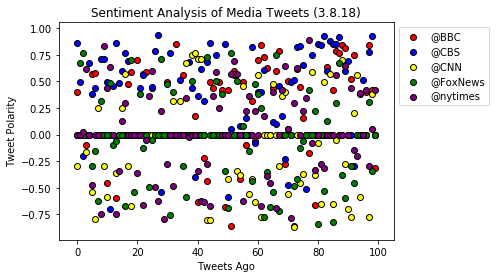

In [81]:
# Create a list of 0-100 for "Tweets Ago" x-axis
x_values = list(range(0,100))

# Plot each list of composite scores
plt.scatter(x_values,cmp_data[0]["Compound"],facecolors="red",edgecolor="black")
plt.scatter(x_values,cmp_data[1]["Compound"],facecolors="blue",edgecolor="black")
plt.scatter(x_values,cmp_data[2]["Compound"],facecolors="yellow",edgecolor="black")
plt.scatter(x_values,cmp_data[3]["Compound"],facecolors="green",edgecolor="black")
plt.scatter(x_values,cmp_data[4]["Compound"],facecolors="purple",edgecolor="black")

# Set title and axis labels
plt.title("Sentiment Analysis of Media Tweets (3.8.18)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Set legend to outside the plot, save plot to .png
plt.legend(users,bbox_to_anchor=(1,1))
plt.savefig("media_tweets_scatter.png")
plt.show()

# Create Aggregate Bar Chart

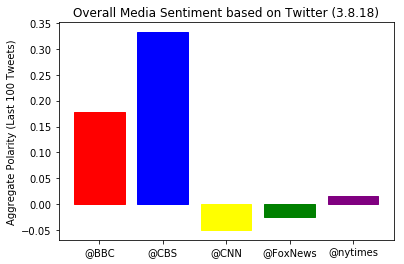

In [89]:
# Create list of average composite score from each user
averages = [np.mean(cmp_data[x]["Compound"]) for x in list(range(5))]

# Chart each average, keeping the same colors from the scatterplot
chart = plt.bar(users,averages,)
chart[0].set_color("red")
chart[1].set_color("blue")
chart[2].set_color("yellow")
chart[3].set_color("green")
chart[4].set_color("purple")

#Create title and labels, save to .png
plt.title("Overall Media Sentiment based on Twitter (3.8.18)")
plt.ylabel("Aggregate Polarity (Last 100 Tweets)")
plt.savefig("media_tweets_bar.png")
plt.show()